In [2]:
import os
import pandas as pd
from collections import Counter

#wordcloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#NLP summarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.summarizers.lsa import LsaSummarizer
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

#NLP Sentiment analysis 
from nltk.sentiment import SentimentIntensityAnalyzer

# Textual Data Exploration

In [3]:
# van Halen 1984 album
album_folder = r'C:\Users\Aditya Kalhan\OneDrive - Thapar University\College\Projects\1984 Album vs 1984 Novel\1984-NLP\Data\1984 album Van Halen'
songs = os.listdir(album_folder)
songs

['Drop Dead Legs.txt',
 'Girl Gone Bad.txt',
 'Hot for Teacher.txt',
 'House of Pain.txt',
 "I'll Wait.txt",
 'Jump.txt',
 'Panama.txt',
 'Top Jimmy.txt']

In [4]:
album_corpus = []
for lyrics in songs :
    with open(album_folder+'/'+lyrics,encoding = 'utf8') as f_input :
        album_corpus.append(f_input.read())
print(album_corpus)       

["Drop dead legs, pretty smile\nHurts my head, gets me wild\nDig that steam\nGiant butt\nMakes me scream\nI get nothing, nothing but the shakes over you\nAnd nothing else could ever do\n\n[Chorus:]\nYou know that you want it\nI know what you need\nYou know that you want it, baby\nWhen the night is through, will I still be loving you?\n\nDig those moves, vampire\nSet me loose, get it higher\nThrow my rope, loop-de-loop\nNice white teeth, Betty Boop\nSet it cool, real heavy\nI ain't fooled, gettin' ready\nOooh, aw baby\n\n[Chorus]\nYou know that you want it\nI know what you need\nYou know that you want it, baby\nWhen the night is through, will I still be loving you?", "[Verse 1]\nAh lazy eyes in the summer heat\nFresh from outta town\nNow she's working on the street\nShakin' poor boys down\n\n[Chorus]\nUh (girl) uh girl gone bad\n(Girl) girl gone bad\n\n[Verse 2]\nFound that girl with a lonesome John\nBut she should've been with me\nGuess that woman fallen in love\nShe don't work for fre

In [5]:
album_word_list = []
for lyrics in album_corpus :
    for word in lyrics.split() :
        album_word_list.append(word)
album_word_list

['Drop',
 'dead',
 'legs,',
 'pretty',
 'smile',
 'Hurts',
 'my',
 'head,',
 'gets',
 'me',
 'wild',
 'Dig',
 'that',
 'steam',
 'Giant',
 'butt',
 'Makes',
 'me',
 'scream',
 'I',
 'get',
 'nothing,',
 'nothing',
 'but',
 'the',
 'shakes',
 'over',
 'you',
 'And',
 'nothing',
 'else',
 'could',
 'ever',
 'do',
 '[Chorus:]',
 'You',
 'know',
 'that',
 'you',
 'want',
 'it',
 'I',
 'know',
 'what',
 'you',
 'need',
 'You',
 'know',
 'that',
 'you',
 'want',
 'it,',
 'baby',
 'When',
 'the',
 'night',
 'is',
 'through,',
 'will',
 'I',
 'still',
 'be',
 'loving',
 'you?',
 'Dig',
 'those',
 'moves,',
 'vampire',
 'Set',
 'me',
 'loose,',
 'get',
 'it',
 'higher',
 'Throw',
 'my',
 'rope,',
 'loop-de-loop',
 'Nice',
 'white',
 'teeth,',
 'Betty',
 'Boop',
 'Set',
 'it',
 'cool,',
 'real',
 'heavy',
 'I',
 "ain't",
 'fooled,',
 "gettin'",
 'ready',
 'Oooh,',
 'aw',
 'baby',
 '[Chorus]',
 'You',
 'know',
 'that',
 'you',
 'want',
 'it',
 'I',
 'know',
 'what',
 'you',
 'need',
 'You',
 'kno

In [6]:
len(album_word_list)

1398

In [7]:
# for unique number of words 
album_word_count_unique = Counter(album_word_list)
print(len(album_word_count_unique))

493


In [9]:
# George Orwell 1984 novel
novel = r'C:\Users\Aditya Kalhan\OneDrive - Thapar University\College\Projects\1984 Album vs 1984 Novel\1984-NLP\Data\1984-novel-George Orwell.txt'
novel_corpus = []
with open(novel,encoding = 'utf8') as f_input :
    novel_corpus.append(f_input.read())

In [9]:
novel_corpus

['Title:      Nineteen eighty-four\nAuthor:     George Orwell (pseudonym of Eric Blair) (1903-1950)\n\n\n\n\nPART ONE\n\n\n\nChapter 1\n\n\n\nIt was a bright cold day in April, and the clocks were striking thirteen.\nWinston Smith, his chin nuzzled into his breast in an effort to escape the\nvile wind, slipped quickly through the glass doors of Victory Mansions,\nthough not quickly enough to prevent a swirl of gritty dust from entering\nalong with him.\n\nThe hallway smelt of boiled cabbage and old rag mats. At one end of it a\ncoloured poster, too large for indoor display, had been tacked to the wall.\nIt depicted simply an enormous face, more than a metre wide: the face of a\nman of about forty-five, with a heavy black moustache and ruggedly handsome\nfeatures. Winston made for the stairs. It was no use trying the lift. Even\nat the best of times it was seldom working, and at present the electric\ncurrent was cut off during daylight hours. It was part of the economy drive\nin prepara

In [10]:
novel_word_list = novel_corpus[0].split()
print('Total words in novel :' , len(novel_word_list))
print('Total unique words in novel : ',len(Counter(novel_word_list)))

Total words in novel : 103377
Total unique words in novel :  15530


# Word Clouds

In [11]:
stopwords = list(get_stop_words('english'))
stopwords

['n',
 'likely',
 "doesn't",
 'specifying',
 'inc',
 'almost',
 'had',
 'hopefully',
 'whence',
 'course',
 'tries',
 'anywhere',
 'also',
 'ours',
 'uucp',
 'ever',
 'respectively',
 "we'd",
 'at',
 'rd',
 'cause',
 'ie',
 'comes',
 'followed',
 'first',
 'why',
 'alone',
 'whoever',
 'that',
 'all',
 'himself',
 'yes',
 'do',
 'not',
 'sub',
 'twice',
 "i've",
 'thanx',
 'either',
 'such',
 'whereby',
 "isn't",
 "they're",
 "can't",
 'on',
 'w',
 'together',
 'within',
 'always',
 'thats',
 'take',
 'wherein',
 'near',
 'appropriate',
 'most',
 'besides',
 'eight',
 "c's",
 'nothing',
 'needs',
 'wish',
 'via',
 'what',
 'among',
 'plus',
 "it'll",
 'before',
 'got',
 'took',
 'sometimes',
 'think',
 'itself',
 'sent',
 'thereby',
 'another',
 'presumably',
 'seems',
 "we'll",
 'yet',
 'wonder',
 'during',
 'et',
 'unfortunately',
 'hers',
 'u',
 'ones',
 "didn't",
 'enough',
 'somebody',
 'kept',
 'different',
 'associated',
 'edu',
 'new',
 'usually',
 'else',
 'way',
 "a's",
 'ask

In [12]:
from string import punctuation
for ele in punctuation :
    stopwords.append(ele)
stopwords.extend(['i'])

In [13]:
clean_album_word_list = []
for word in album_word_list :
    if word.lower() not in stopwords :
        clean_album_word_list.append(word)

In [14]:
clean_album_word_list
for i in range(len(clean_album_word_list)) :
    if clean_album_word_list[i] == 'bad,' :
        clean_album_word_list[i] = 'bad'

In [15]:
import nltk
frequency_clean_album = nltk.FreqDist(clean_album_word_list)

In [16]:
for ele in frequency_clean_album :
    print(ele,frequency_clean_album[ele])

bad 31
[Chorus] 17
hot 13
[Verse 12
teacher 12
jump 12
Panama 10
Oh, 8
[Pre-Chorus] 8
Jimmy 8
uh 7
1] 6
girl 6
2] 6
Girl 6
[Spoken] 6
missed 6
(Jump!) 6
ahead 6
Uh 5
[Outro] 5
Ooh 5
[Guitar 5
Solo] 5
uh, 5
Jump 5
Panama, 5
it, 4
"Oh 4
man, 4
man!" 4
school 4
education 4
homework 4
heard 4
"I 4
feel 4
leave 4
coming 4
Top 4
baby 3
night 3
gonna 3
stop 3
wanna 3
Yeah, 3
yeah 3
back 3
machine 3
ah! 3
oh-oh-oh-oh 3
Dig 2
[Chorus:] 2
through, 2
loving 2
you? 2
Set 2
real 2
Ah 2
eyes 2
heat 2
(Girl) 2
ah, 2
ah 2
yeah) 2
[Instrumental 2
Intro] 2
wow, 2
it" 2
"Wait 2
second, 2
man 2
teacher's 2
year?" 2
"My 2
butt, 2
uh! 2
yeah! 2
T-t-teacher, 2
screamin' 2
Teacher, 2
see? 2
uptown 2
fool 2
Hell, 2
doin' 2
Ow, 2
"Hey, 2
us, 2
back!" 2
("I'm 2
ready") 2
brought 2
pencil 2
Gimme 2
write 2
on, 2
Uh! 2
lessons, 2
lessons 2
cold 2
Cherry 2
Lawn, 2
bold? 2
golden 2
rule? 2
Whoa, 2
Wha-oh 2
clock 2
slow, 2
man" 2
("What 2
weekend?") 2
tardy" 2
"Class 2
dismissed!" 2
a-yes 2
Wow! 2
God! 2
Whoo! 2
Gonn

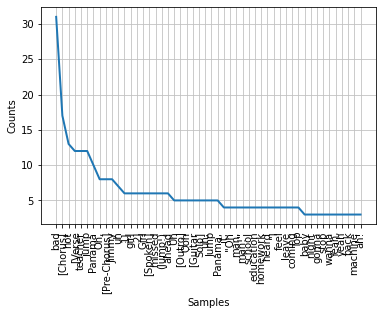

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [17]:
frequency_clean_album.plot(50,cumulative = False)

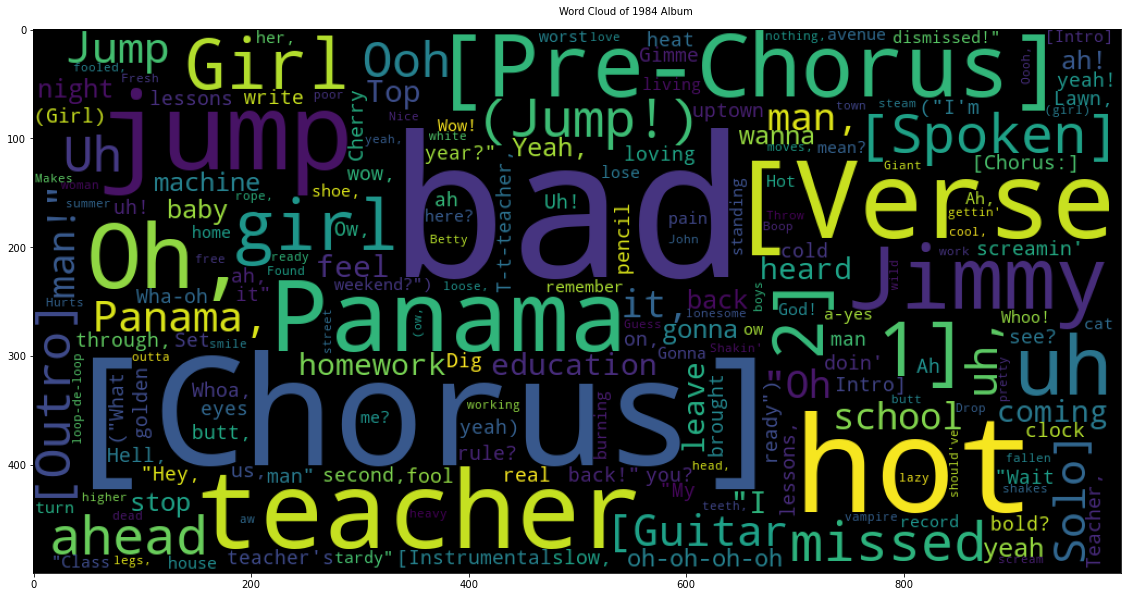

In [18]:
count_clean_album_list = Counter(clean_album_word_list)
album_wordcloud = WordCloud(width = 1000,height = 500).generate_from_frequencies(count_clean_album_list)
plt.figure(figsize = (20,10))
plt.figtext(0.5,0.9,"Word Cloud of 1984 Album")
plt.imshow(album_wordcloud)

In [27]:
clean_novel_word_list = []
for word in novel_word_list :
    if word.lower() not in stopwords :
        clean_novel_word_list.append(word)
clean_novel_word_list


['Title:',
 'Nineteen',
 'eighty-four',
 'Author:',
 'George',
 'Orwell',
 '(pseudonym',
 'Eric',
 'Blair)',
 '(1903-1950)',
 'PART',
 'Chapter',
 '1',
 'bright',
 'cold',
 'day',
 'April,',
 'clocks',
 'striking',
 'thirteen.',
 'Winston',
 'Smith,',
 'chin',
 'nuzzled',
 'breast',
 'effort',
 'escape',
 'vile',
 'wind,',
 'slipped',
 'quickly',
 'glass',
 'doors',
 'Victory',
 'Mansions,',
 'quickly',
 'prevent',
 'swirl',
 'gritty',
 'dust',
 'entering',
 'him.',
 'hallway',
 'smelt',
 'boiled',
 'cabbage',
 'rag',
 'mats.',
 'end',
 'coloured',
 'poster,',
 'large',
 'indoor',
 'display,',
 'tacked',
 'wall.',
 'depicted',
 'simply',
 'enormous',
 'face,',
 'metre',
 'wide:',
 'face',
 'man',
 'forty-five,',
 'heavy',
 'black',
 'moustache',
 'ruggedly',
 'handsome',
 'features.',
 'Winston',
 'made',
 'stairs.',
 'lift.',
 'times',
 'seldom',
 'working,',
 'present',
 'electric',
 'current',
 'cut',
 'daylight',
 'hours.',
 'part',
 'economy',
 'drive',
 'preparation',
 'Hate',
 '

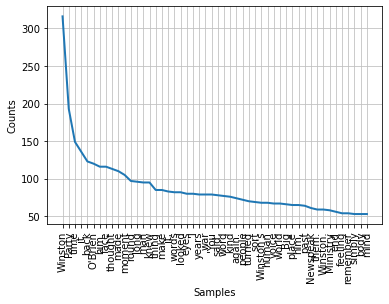

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [28]:
freq_novel_list = nltk.FreqDist(clean_novel_word_list) 
freq_novel_list.plot(50,cumulative = False)

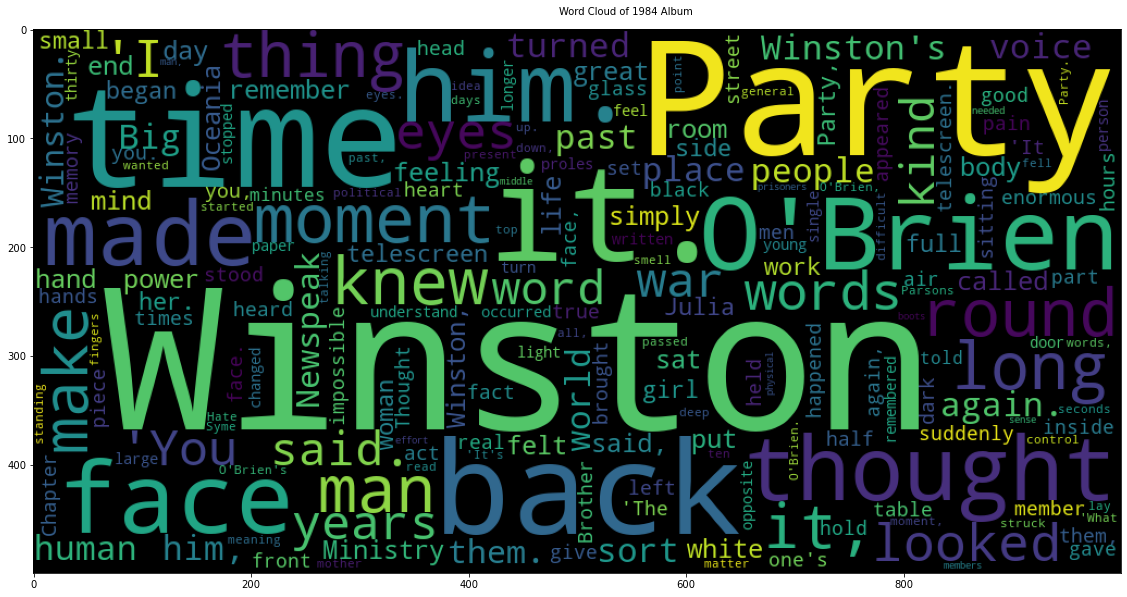

In [29]:
novel_wordcloud = Counter(clean_novel_word_list)
word_cloud_1984_novel = WordCloud(width = 1000,height = 500).generate_from_frequencies(novel_wordcloud)
plt.figure(figsize = (20,10))
plt.figtext(0.5,0.9,"Word Cloud of 1984 Album")
plt.imshow(word_cloud_1984_novel)

# NLP Summarization

In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Aditya
[nltk_data]     Kalhan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
lsa = LsaSummarizer(Stemmer('english'))
lsa.stop_words = get_stop_words('english') 
parser = PlaintextParser.from_string(' '.join(album_corpus),Tokenizer('english'))
lsa_summary = lsa(parser.document,10)
lsa_summary

(<Sentence: Drop dead legs, pretty smile Hurts my head, gets me wild Dig that steam Giant butt Makes me scream I get nothing, nothing but the shakes over you And nothing else could ever do>,
 <Sentence: Dig those moves, vampire Set me loose, get it higher Throw my rope, loop-de-loop Nice white teeth, Betty Boop Set it cool, real heavy I ain't fooled, gettin' ready Oooh, aw baby>,
 <Sentence: [Verse 1] Ah lazy eyes in the summer heat Fresh from outta town Now she's working on the street Shakin' poor boys down>,
 <Sentence: [Verse 2] Found that girl with a lonesome John But she should've been with me Guess that woman fallen in love She don't work for free>,
 <Sentence: [Verse 1] Say you're gonna leave me 'Cause I only tie you up I always loved you tender But you only like it rough Woman bound for glory Why you're leavin' me again?>,
 <Sentence: Here she comes, full blast and top down Hot shoe, burning down the avenue Model citizen, zero discipline>,
 <Sentence: [Verse 2] Ain't nothin' li

In [38]:
lsa_summary_list = [str(sentence) for sentence in lsa_summary]
summary_album = ' '.join(lsa_summary_list)
print("Summary of the album : ")
summary_album

Summary of the album : 


"Drop dead legs, pretty smile Hurts my head, gets me wild Dig that steam Giant butt Makes me scream I get nothing, nothing but the shakes over you And nothing else could ever do Dig those moves, vampire Set me loose, get it higher Throw my rope, loop-de-loop Nice white teeth, Betty Boop Set it cool, real heavy I ain't fooled, gettin' ready Oooh, aw baby [Verse 1] Ah lazy eyes in the summer heat Fresh from outta town Now she's working on the street Shakin' poor boys down [Verse 2] Found that girl with a lonesome John But she should've been with me Guess that woman fallen in love She don't work for free [Verse 1] Say you're gonna leave me 'Cause I only tie you up I always loved you tender But you only like it rough Woman bound for glory Why you're leavin' me again? Here she comes, full blast and top down Hot shoe, burning down the avenue Model citizen, zero discipline [Verse 2] Ain't nothin' like it, her shiny machine Got the feel for the wheel, keep the moving parts clean Hot shoe, burn

## For the novel

In [39]:
lsa = LsaSummarizer(Stemmer('english'))
lsa.stop_words = get_stop_words('english') 
parser = PlaintextParser.from_string(' '.join(novel_corpus),Tokenizer('english'))
lsa_summary = lsa(parser.document,10)
lsa_summary_list = [str(sentence) for sentence in lsa_summary]
summary_novel = ' '.join(lsa_summary_list)
print("Summary of the novel : ")
summary_novel

C:\Users\Aditya Kalhan\anaconda3\lib\site-packages\sumy\summarizers\lsa.py:76: UserWarning: Number of words (5811) is lower than number of sentences (6827). LSA algorithm may not work properly.
  warn(message % (words_count, sentences_count))


Summary of the novel : 


"And the Records Department, after all, was itself only a single branch of the Ministry of Truth, whose primary job was not to reconstruct the past but to supply the citizens of Oceania with newspapers, films, textbooks, telescreen programmes, plays, novels--with every conceivable kind of information, instruction, or entertainment, from a statue to a slogan, from a lyric poem to a biological treatise, and from a child's spelling-book to a Newspeak dictionary. The ideal set up by the Party was something huge, terrible, and glittering--a world of steel and concrete, of monstrous machines and terrifying weapons--a nation of warriors and fanatics, marching forward in perfect unity, all thinking the same thoughts and shouting the same slogans, perpetually working, fighting, triumphing, persecuting--three hundred million people all with the same face. As they drifted down the crowded pavements, not quite abreast and never looking at one another, they carried on a curious, intermittent conver

# NLP Sentiment Analysis

In [40]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to C:\Users\Aditya
[nltk_data]     Kalhan\AppData\Roaming\nltk_data...


True

In [44]:
sentiment_analyzer = SentimentIntensityAnalyzer()
print('sentiment analysis of 1984 album')
print(sentiment_analyzer.polarity_scores(' '.join(album_corpus)))

sentiment analysis of 1984 album
{'neg': 0.155, 'neu': 0.713, 'pos': 0.133, 'compound': -0.9953}


In [45]:
print('sentiment analysis of 1984 novel')
print(sentiment_analyzer.polarity_scores(' '.join(novel_corpus)))

sentiment analysis of 1984 novel
{'neg': 0.106, 'neu': 0.798, 'pos': 0.096, 'compound': -1.0}
